# COMP4702/7703 Prac 7: MNIST Deep Learning with TensorFlow
This notebook will allow you to create deep networks and MLPs for the MNIST dataset using tensorflow. As the course assumes no python knowledge I have written some code to do the implementation for you.
If you are not using a lab computer to do this practical, you will need to install TensorFlow on your machine before continuing. See [here](https://www.tensorflow.org/install/) for more information on how to do this.

# Disclaimer - this code has been tested on Ubuntu16.04 and Windows10 only.
## Lets get cracking!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
from prac7ConvMLPModel import *
from SupportCode.Helpers import *
import tensorflow as tf

To begin, we will create an MLP with default settings. Running this the first time will be a bit slow as it will download the MNIST dataset. The number of training steps has been set to a small number in order to verify the code is working and for you to see what the output is.

In [5]:
prac7ConvMLPModel()

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


AttributeError: module 'tensorflow' has no attribute 'placeholder'

You'll notice that two new TensorBoard tabs have opened in your browser. These display a variety of information about the network parameters. One tab indicates the test set summaries and accuracies and the other tab is the train set summaries. In the bottom left corner of the page you will see either "MODELtrainX" or "MODELtestX". X indicates the run number - this simply corresponds to the order that you run them in. MODEL is just the model name - either "MLP" or "convNet".

To open a previous TensorBoard simply call:

In [17]:
openTensorBoardAtIndex("MLP",0)

You need to run at least a model


As you go through the prac make sure to keep track of your settings for a given run - if you lose track you'll have to delete the folder and start again. -Each file is in the order of 10s-100s of MBs so you might need to delete some.

A particularly interesting part of the tensorboard is the images tab. This shows the weight values as a greyscale image for each layer. You can move the sliding bar to see how the weights change over each iteration.

# Configure your MLP
By default prac7ConvMLPModel() will generate an MLP with one hidden layer that consists of 500 neurons. It will use stochastic gradient decent to optimise. You'll also notice that it doesn't perform very well.

To change this you will need to change the optimiser values and the hidden layer values. Your prac 6 MLP might be a good start... unless it was bad ><.

## Lets take a look at the optimisers
In this prac you can use the following  optimisers: GradientDescent, Adam, RMSProp, Momentum, and Adagrad.

Adam seems to be the most popular at the moment, followed by RMSProp.

The following code should help you in configuring your optimisers. If you don't know what a parameter for a particular optimiser does remember that google is your friend. If you want to take a look at the tensorflow documentation check out the [TensorFlow documention](https://www.tensorflow.org/api_guides/python/train) 

**Don't** forget to *change* these values (srsly they will throw errors ;))!

In [ ]:
#Create an optimisation dictionary for GD
optDicGD = {}
optDicGD["optMethod"] = "GradientDescent"
optDicGD["learning_rate"] = 10
#Create an optimisation dictionary for Momentum
optDicM = {}
optDicM["optMethod"] = "Momentum"
optDicM["learning_rate"] = 10
optDicM["momentum"] = 2
#Adagrad
optDicAGrad = {}
optDicAGrad["optMethod"] = "Adagrad"
optDicAGrad["learning_rate"] = 1
optDicAGrad["initial_accumulator_value"] = 1
#RMSProp
optDicRMS = {}
optDicRMS["optMethod"] = "RMSProp"
optDicRMS["learning_rate"] = 10
optDicRMS["momentum"] = 2
optDicRMS["decay"] = 1
optDicRMS["centered"] = False #This normalises the weights if True
#Adam
optDicAdam = {}
optDicAdam["optMethod"] = "Adam"
optDicAdam["learning_rate"] = 1
optDicAdam["beta1"]=5
optDicAdam["beta2"]=5

The MLP is pretty easy to set up as you only need to chose the layer layout. You could also change the activation function but by default it's the rectilinear unit or RELU. Check out the [TensorFlow documention](https://www.tensorflow.org/api_guides/python/)  for which functions you can use and then change the act parameter in the function call.

In [ ]:
activationFunction = tf.nn.relu
#MLP Parameters - make 2 hidden layers [500,20]
MLPTopology={}
MLPTopology['hiddenDims'] = [500,100]
prac7ConvMLPModel(model='MLP',MLPTop=MLPTopology,optimiser=optDicGD,act=activationFunction, max_steps=100)

## Q1

### (a)
Compare the performance of the different optimisers using the MLP topology you chose in Prac 6 Q3. 

### Instructions
* Use a **table** to present your results including the hyper-parameters selected. 
* Describe in **at most** 250 words your methodology for selecting hyper-parameters.
* Discuss in **at most** 150 words what attributes of each optimiser might make it perform better or worse. 

### (b)
Compare the performance of the network from (a) using ReLU, tanh, and sigmoid functions as the activation function.

### Instructions
* Use a **table** to present your results. 
* Discuss in **at most** 150 words the differences in the functions, and why that may have lead to different results. 

### Hints

Don't forget to play with the parameters, as the ones above will probably throw errors!

Increase 'max_steps' to increase the number of iterations. Also, use TensorBoard - it might provide some insight into what's happening during training.

If you have any trouble using any of the parameters, consult the [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/). The search bar up the top is really good! (I guess it's not surprising considering the API is made by Google).

# Convolutional Neural Networks (CNNs)

So, unless you're not at all interested in machine learning and AI (in which case why are you doing this course?!), you will have heard of convolutional neural networks. They are very high on the hype-curve because they have been very successful, amongst other things, at image processing. Here we will construct a small CNN to do classification on the MNIST dataset.

The network follows this structure:

[conv -> max_pool]*N -> FC -> FC

where:
* conv is a convolutional layer that applies a kernel to the previous layer
* max_pool is a pooling layer
* N is the number of conv-pool repititions 
* FC is a fully connected layer

Again, the activation function is ReLU by default but feel free to change it! The number of filters in each convolutional layer is given by the layer number multiplied by the 'numFilters' variable defined in the code below; i.e. with 'numFilters' = 32, the first conv layer will have 32 filters, the second 64, the third 96, and so on.

In [ ]:
convTop = {}
activationFunction = tf.nn.relu
convTop['convPoolLayers'] = 1 #N
#Convolutional layer parameters
convTop['filterSize'] = 3 #F
convTop['convStride'] = 1 #S
#This is equivalent to the number of features
convTop['numFilters'] = 32 #K
#Pooling parameters
convTop['poolK'] = 2 #F
convTop['poolStride'] = 2 #S
#Size of the first FC layer (Any ideas why we don't need to specify the size of the output layer? ;))
convTop['FCLayerSize'] = 512

In [ ]:
prac7ConvMLPModel(model='convNet',convTop=convTop,optimiser=optDicRMS,act=activationFunction, max_steps=100)

Have a look at the images of the convolutional weights in TensorBoard. Hopefully you find them interesting. [Here](http://cs231n.github.io/convolutional-networks/ ) is an excllent resource for more information on CNNs. Have a read of this material before continuing.

So you've implemented a CNN and that's pretty cool, but did you understand it?

## Q2

Using the link to the CS231n CNN theory given above, calculate the volume for the weight matrices of each layer for a convolutional network that has two conv-pool layers:

\[conv -> max_pool\] (Layer 1) -> \[conv -> max_pool\] (Layer 2) -> FC -> FC

Assume: 
* The input is 28x28.
* Parameter sharing.
* The number of filters in a particular layer is given by the expression: i*32, where i is the layer number.

For the conv layer, assume:
* A padding of 1 (P=1).
* A stride length of 1.
* A spatial extent of 3.

For the pooling layer, assume:
* A stride length of 1
* A spatial extent of 2

Assume that the first FC layer has 1024 neurons and the second has the number of classes in MNIST. 

Once you have done this calculate the number of parameters in this network.

### Hint:
Don't forget the biases!

## Q3
Calculate the number of parameters in an MLP that has two hidden layers, with 1000 neurons in the first hidden layer, and 300 neurons in the second hidden layer.

Compare this number to the number of parameters that you calculated for the CNN in Q2.

## Q4
Compare the performance of the MLP and the CNN that you created. 

### Instructions:

* Use a **table** to display your results and hyper-parameter choices.
* Discuss the hyper-parameter selection of your CNN in **at most** 150 words.
* Discuss the difference between the MLP and CNN in **at most** 100 words.

## Fun for Everyone 

So CNNs are super cool. They can make artwork like this:

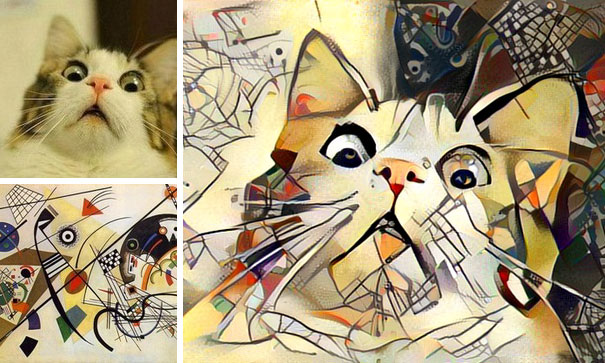

Or they can make cool pictures like this:

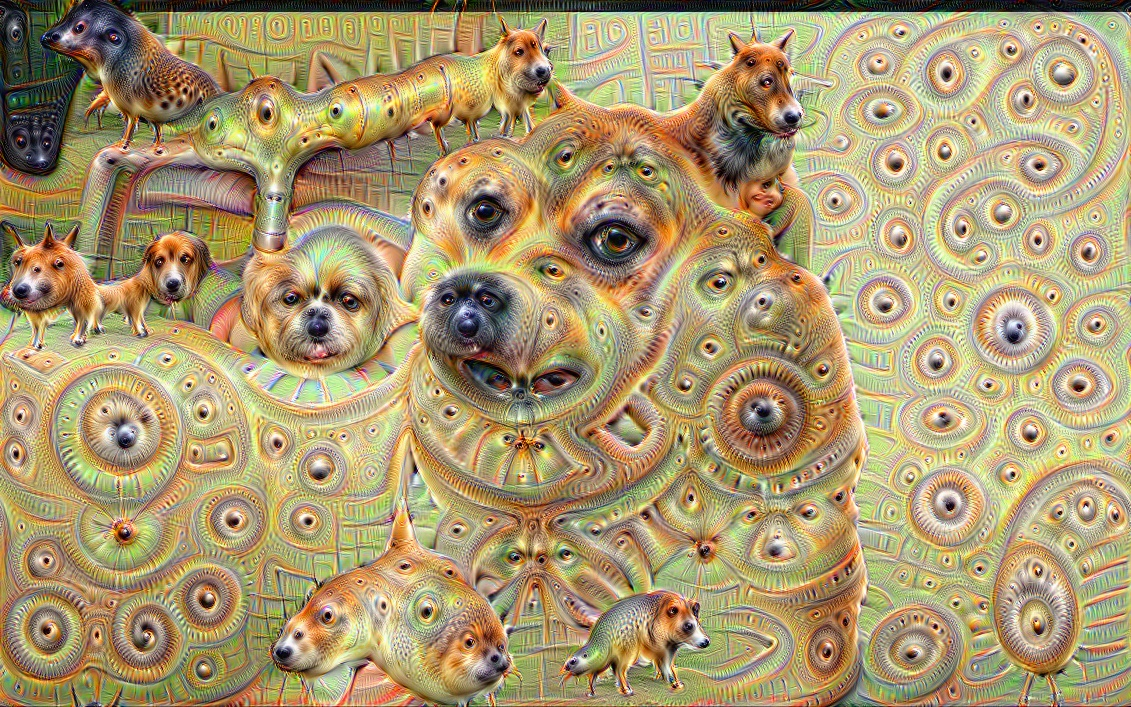

for maximum doge effect!

Included in the assignment zip is the deep dream notebook (The second picture is generated from deep dream) that is available from the tensorflow tutorials. If you'd like feel free to go through the notebook and do some dreaming :).